In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
print("TensorFlow版本:", tf.__version__)
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train image shape:", train_images.shape, "Train label shape:", train_labels.shape)
print(" Test image shape:", test_images.shape, " Test label shape:", test_labels.shape)

TensorFlow版本: 1.14.0
Train image shape: (60000, 28, 28) Train label shape: (60000,)
 Test image shape: (10000, 28, 28)  Test label shape: (10000,)


In [2]:
total_num = len(train_images)
valid_split = 5000
train_num = int(total_num - valid_split)
train_x = train_images[:train_num]
train_y = train_labels[:train_num]
valid_x = train_images[train_num:]
valid_y = train_labels[train_num:]
test_x = test_images
test_y = test_labels

标签值 5


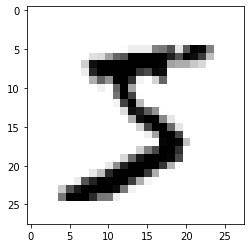

In [3]:
train_x = train_x.reshape(-1,784)
valid_x = valid_x.reshape(-1,784)
test_x  = test_x.reshape(-1,784)
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

print("标签值", train_y[0])
plot_image(train_x[0])

In [4]:
train_x = tf.cast(train_x/255.0, tf.float32)
valid_x = tf.cast(valid_x/255.0, tf.float32)
test_x  = tf.cast(test_x/255.0, tf.float32)
print("训练集 train_x 数量:", train_x.shape,
    "\n验证集 valid_x 数量:", valid_x.shape,
    "\n测试集  test_x 数量:", test_x.shape)

训练集 train_x 数量: (55000, 784) 
验证集 valid_x 数量: (5000, 784) 
测试集  test_x 数量: (10000, 784)


In [5]:
train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y  = tf.one_hot(test_y, depth=10)
print("训练集标签 train_y 数量:", train_y.shape,
    "\n验证集标签 valid_y 数量:", valid_y.shape,
    "\n测试集标签  test_y 数量:", test_y.shape)

训练集标签 train_y 数量: (55000, 10) 
验证集标签 valid_y 数量: (5000, 10) 
测试集标签  test_y 数量: (10000, 10)


In [6]:
# mnist 中每张图片共28*28=784个像素点
x = tf.compat.v1.placeholder(tf.float32, [None, 784], name="X")
# 0-9 一共10个数字=>10个类别
y = tf.compat.v1.placeholder(tf.float32, [None, 10], name="Y")

In [7]:
# # 创建变量
# 在本案例中，以正态分布的随机数初始化权重W，以常数0初始化偏置b
# 定义变量
#隐藏层神经元数量
H1_NN = 256 # 第1隐藏层神经元为256
H2_NN = 64  # 第2隐藏层神经元为64
H3_NN = 32  # 第3隐藏层神经元为32

# 输入层 - 第1隐藏层参数和偏置项
W1 = tf.Variable(tf.random.truncated_normal([784, H1_NN], stddev=0.1))
b1 = tf.Variable(tf.zeros([H1_NN]))

# 第1隐藏层 - 第2隐藏层参数和偏置项
W2 = tf.Variable(tf.random.truncated_normal([H1_NN, H2_NN], stddev=0.1))
b2 = tf.Variable(tf.zeros([H2_NN]))

# 第2隐藏层 - 第3隐藏层参数和偏置项
W3 = tf.Variable(tf.random.truncated_normal([H2_NN, H3_NN], stddev=0.1))
b3 = tf.Variable(tf.zeros([H3_NN]))

# 第3隐藏层 - 输出层参数和偏置项
W4 = tf.Variable(tf.random.truncated_normal([H3_NN, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

# 计算第1隐藏层结果
Y1 = tf.nn.relu(tf.matmul(x, W1) + b1)
# 计算第2隐藏层结果
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
# 计算第3隐藏层结果
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)

# 计算输出结果
forward = tf.matmul(Y3, W4) + b4

In [8]:
# 关于Softmax Regression
#   当我们处理多分类任务时，通常需要使用Softmax Regression模型。
#   Softmax Regression会对每一类别估算出一个概率。
# 工作原理：
#   将判定为某一类的特征相加，然后将这些特征转化为判定是这一类的概率。
pred = tf.nn.softmax(forward) #Sotfmax分类

In [9]:
# # 训练模型
# ## 设置训练参数
train_epochs = 200 # 训练轮数
batch_size = 50 # 单次训练样本数（批次大小）
total_batch = int(train_num/batch_size) # 一轮训练有多少批次
display_step = 10 # 显示粒度
learning_rate = 0.01 # 学习率

In [10]:
# ## 定义损失函数
# 定义交叉熵损失函数
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=forward, labels=y))

In [11]:
# ## 选择优化器
# 梯度下降优化器
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
#optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss_function)

In [12]:
# ## 定义准确率
# 检查预测类别tf.argmax(pred,1)与实际类别tf.argmax(y,1)的匹配情况
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [13]:
# 准确率，将布乐值转化为浮点数，并计算平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
from time import time
startTime = time()

In [15]:
sess = tf.compat.v1.Session() # 声明会话
init = tf.compat.v1.global_variables_initializer() # 变量初始化
sess.run(init)

In [16]:
train_x = sess.run(train_x)
valid_x = sess.run(valid_x)
train_y = sess.run(train_y)
valid_y = sess.run(valid_y)
test_x  = sess.run(test_x)
test_y  = sess.run(test_y)

In [17]:
# # 模型训练
#开始训练
loss_list = [] # 用于保存loss值的列表

for epoch in range(train_epochs):
    loss_sum = 0.0
    for step in range(total_batch):
    
        xs = train_x[step*batch_size:(step+1)*batch_size]
        ys = train_y[step*batch_size:(step+1)*batch_size]

        _, loss = sess.run([optimizer, loss_function], feed_dict = {x: xs, y: ys})  # 执行批次训练
        
        loss_sum = loss_sum + loss
        
    # total_batch个批次训练完成后,使用验证数据计算误差与准确率;验证集没有分批
    loss,acc = sess.run([loss_function, accuracy], feed_dict={x: valid_x, y: valid_y})
    
    loss_average = loss_sum/total_batch
    loss_list.append(loss_average) #每轮添加一次
    
    # 打印训练过程中的详细信息
    if(epoch+1) % display_step == 0:
        print("Train Epoch:%3d" % (epoch+1), "Loss={:.9f}".format(loss), "Accuracy={:.4f}".format(acc))

print("Train Finished!")

Train Epoch: 10 Loss=0.123791330 Accuracy=0.9672
Train Epoch: 20 Loss=0.096114516 Accuracy=0.9734
Train Epoch: 30 Loss=0.089645743 Accuracy=0.9764
Train Epoch: 40 Loss=0.091331549 Accuracy=0.9768
Train Epoch: 50 Loss=0.095225461 Accuracy=0.9780
Train Epoch: 60 Loss=0.098706789 Accuracy=0.9790
Train Epoch: 70 Loss=0.101990901 Accuracy=0.9794
Train Epoch: 80 Loss=0.105679318 Accuracy=0.9794
Train Epoch: 90 Loss=0.109298073 Accuracy=0.9794
Train Epoch:100 Loss=0.112631761 Accuracy=0.9796
Train Epoch:110 Loss=0.115548752 Accuracy=0.9800
Train Epoch:120 Loss=0.118040942 Accuracy=0.9796
Train Epoch:130 Loss=0.120204635 Accuracy=0.9802
Train Epoch:140 Loss=0.122076198 Accuracy=0.9804
Train Epoch:150 Loss=0.123808704 Accuracy=0.9804
Train Epoch:160 Loss=0.125349194 Accuracy=0.9804
Train Epoch:170 Loss=0.126773998 Accuracy=0.9804
Train Epoch:180 Loss=0.128080428 Accuracy=0.9804
Train Epoch:190 Loss=0.129274413 Accuracy=0.9804
Train Epoch:200 Loss=0.130368412 Accuracy=0.9806
Train Finished!


In [18]:
#运行总时间
duration = time()-startTime
print("Train Finished takes:","{:.2f}".format(duration))

Train Finished takes: 161.09


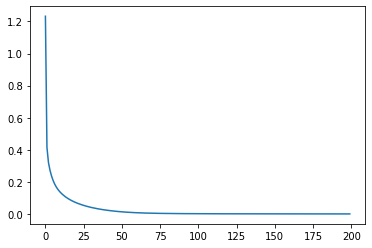

In [19]:
plt.plot(loss_list)

In [20]:
accu_test = sess.run(accuracy,feed_dict={x: test_x, y: test_y})
print("Test Accuracy:", accu_test)

Test Accuracy: 0.9775


In [21]:
accu_validation = sess.run(accuracy, feed_dict={x: valid_x, y: valid_y})
print("Test Accuracy:", accu_validation)

Test Accuracy: 0.9806


In [22]:
accu_train = sess.run(accuracy, feed_dict={x: train_x, y: train_y})
print("Test Accuracy:", accu_train)

Test Accuracy: 1.0


In [23]:
# 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字
prediction_result = sess.run(tf.argmax(pred,1), feed_dict={x: test_x})
# 查看预测结果中的前10项
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [24]:
def plot_images_labels_prediction(images,     # 图像列表
                                  labels,     # 标签列表
                                  prediction, # 预测值列表
                                  index,      # 从第index个开始显示
                                  num=10):    # 缺省一次显示 10 幅
    fig = plt.gcf() # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12) # 1英寸等于2.54cm
    if num > 25:
        num = 25 # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5,i+1) # 获取当前要处理的子图
        ax.imshow(np.reshape(images[index], (28, 28)), cmap="binary") # 显示第index个图像

        title = "label=" + str(np.argmax(labels[index])) # 构建该图上要显示的title信息
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[index])
        
        ax.set_title(title, fontsize=10) # 显示图上的title信息
        ax.set_xticks([]) # 不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()

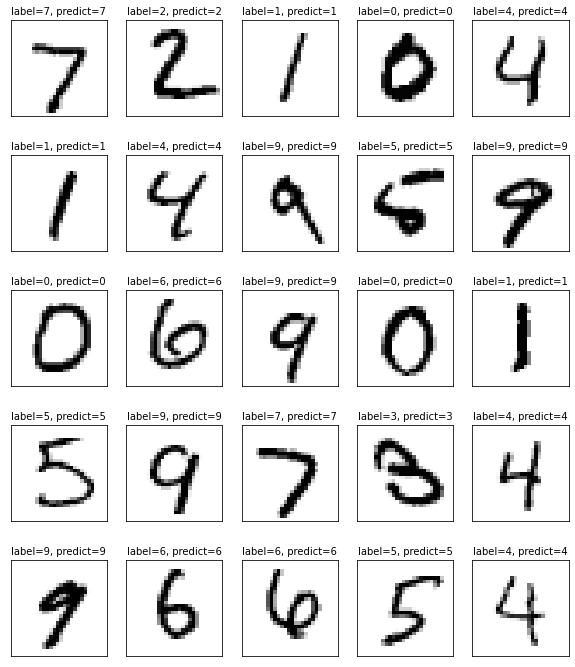

In [27]:
plot_images_labels_prediction(test_x,
                              test_y, 
                              prediction_result, 0, 25)

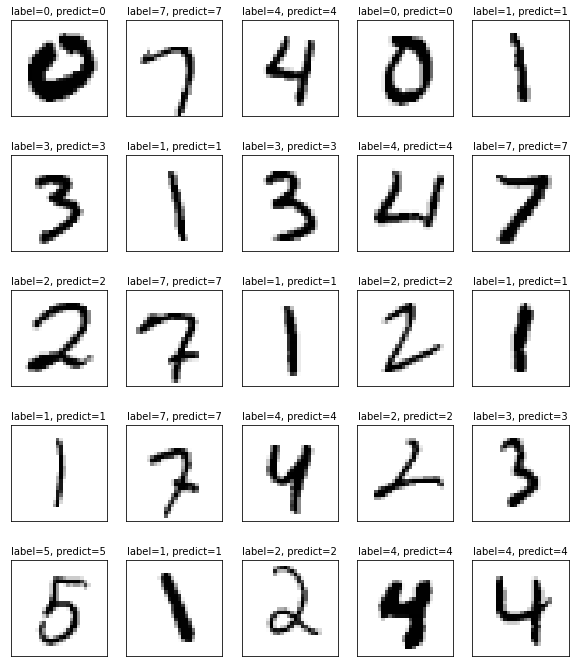

In [28]:
plot_images_labels_prediction(test_x,
                              test_y, 
                              prediction_result, 25, 25)